In [7]:
import pandas as pd
import numpy as np

# Reloading the saved model

In [8]:
import joblib

# For prediction using a SK-Learn model load 'trained_model_sklearn.joblib'
pipeline = joblib.load("./trained_models/model_ordinary.joblib")

# Loading the test data

In [9]:
import pandas as pd

df = pd.read_csv("./dataset/04_test.csv")

df

,date,season,fulltime_result,is_home,team,team_fulltime_goals,team_win_bet365_probs,team_pre_rating,team_possession,team_total_shots,...,fd_team_shots_off_target,fd_team_clear_cut_chances,fd_team_xg,fd_opponent_fulltime_goals,fd_opponent_win_bet365_probs,fd_opponent_total_shots,fd_opponent_shots_on_target,fd_opponent_shots_off_target,fd_opponent_clear_cut_chances,fd_opponent_xg
0,2022-08-26,2022_2023,2,0,Celta Vigo,1,0.32,1949,50,15,...,5,0,1.0,3,-0.13,7,5,3,2,1.0
1,2022-08-26,2022_2023,0,0,Osasuna,2,0.47,1942,55,16,...,5,1,1.2,-1,0.17,-9,-5,-1,-2,-1.0
2,2022-08-27,2022_2023,2,0,Real Sociedad,1,0.24,2023,41,10,...,0,-3,-0.7,1,-0.25,9,1,4,1,0.6
3,2022-08-27,2022_2023,2,0,Real Mallorca,1,0.43,1862,47,13,...,1,3,0.2,2,-0.23,4,1,2,2,0.9
4,2022-08-27,2022_2023,0,0,Sevilla,1,0.24,2084,61,18,...,7,1,1.1,0,-0.20,2,1,-2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2023-02-26,2022_2023,0,1,Athletic Bilbao,0,0.16,2045,43,8,...,-5,0,-0.5,6,-0.10,7,7,1,6,2.7
412,2023-02-26,2022_2023,2,1,Celta Vigo,1,0.16,1928,44,18,...,0,0,0.3,1,0.23,-1,-2,0,-2,-0.6
413,2023-02-26,2022_2023,2,1,Almeria,2,0.53,1860,48,16,...,3,0,-0.5,1,-0.13,10,1,7,0,0.6
414,2023-02-26,2022_2023,0,1,Sevilla,1,0.19,2008,41,7,...,-2,0,-1.6,0,0.13,-4,0,-2,-1,-0.2


# Spliting the dataset

In [10]:
# Removing the columns regarding the first differance
cols_to_remove = [col for col in df.columns if col[:3] == 'fd_'] + ['season', 'date', 'team']
df = df.drop(cols_to_remove, axis='columns')

# Setting the independent variables and the target class
X = df.drop(['fulltime_result'], axis='columns')
y = df['fulltime_result']

# Testing the model

The code below receives a model and a set of X data and predicts the target variable; then compares the target variable with the given actual y and returns the accuracy and the confusion matrix.

In [11]:
import sklearn.metrics as metrics

def test_model(model, X, y):
    probs = pipeline.predict(X)

    accuracy_score = metrics.accuracy_score(y, probs)

    print("The accuracy score using the test set is %.2f%%" %(accuracy_score*100))

    metrics.ConfusionMatrixDisplay.from_predictions(
        y_true=y,
        y_pred=probs,
        display_labels=['Lose', 'Draw', 'Win']);

    metrics.ConfusionMatrixDisplay.from_predictions(
        y_true=y,
        y_pred=probs,
        display_labels=['Lose', 'Draw', 'Win'],
        normalize='true');
    
    return probs

The accuracy score using the test set is 49.76%


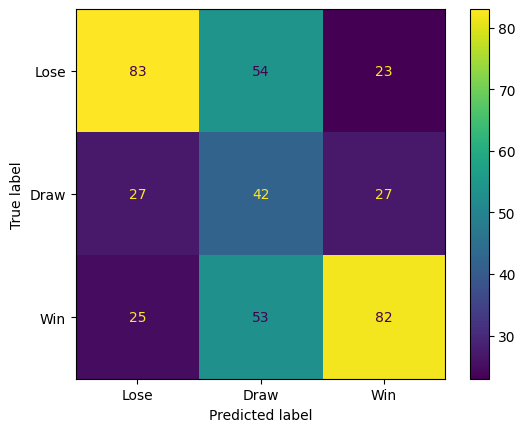

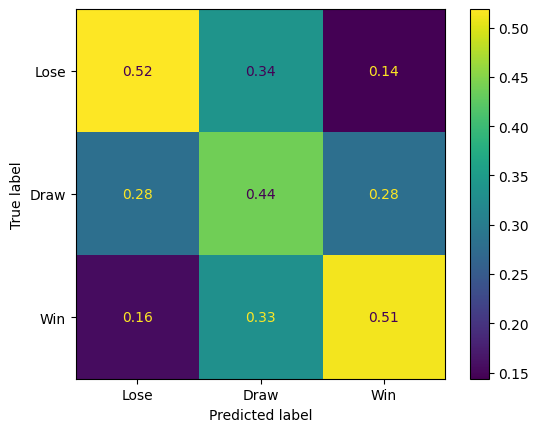

In [12]:
test_model(pipeline, X, y);